# Stock Exchange Data Analysis

In [6]:
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split

# Load the stock data.
data = pandas.read_csv("data/index_processed.csv")
# Check whether the data has been loaded correctly.
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB
None


In [7]:
# Split the data set by 'Index' column.
data_frames_per_index = {
    key: data.loc[value] for key, value in data.groupby("Index").groups.items()
}
# Generate a training and test data set for each index.
train_test_per_index = {}
for key, value in data_frames_per_index.items():
    training_data, test_data = train_test_split(value, train_size=0.8)
    train_test_per_index[key] = [training_data, test_data]

# Check whether the data has been parsed properly.
print(train_test_per_index.keys())
# Check whether the training and test data sets have been generated properly.
print("NYA Training Data:")
print(train_test_per_index["NYA"][0][["Index", "Date", "Adj Close"]].tail())
print("\nNYA Test Data:")
print(train_test_per_index["NYA"][1][["Index", "Date", "Adj Close"]].tail())


dict_keys(['000001.SS', '399001.SZ', 'GDAXI', 'GSPTSE', 'HSI', 'IXIC', 'J203.JO', 'N100', 'N225', 'NSEI', 'NYA', 'SSMI', 'TWII'])
NYA Training Data:
      Index        Date     Adj Close
19184   NYA  2008-06-25   8865.799805
16550   NYA  1998-01-05   5421.890137
21902   NYA  2019-04-12  12969.540040
12415   NYA  1981-08-27    757.820007
11103   NYA  1976-06-17    583.349976

NYA Test Data:
      Index        Date    Adj Close
12303   NYA  1981-03-19   810.369995
17334   NYA  2001-02-13  6954.549805
11778   NYA  1979-02-20   589.380005
20073   NYA  2012-01-04  7612.149902
10237   NYA  1973-01-12   686.760010


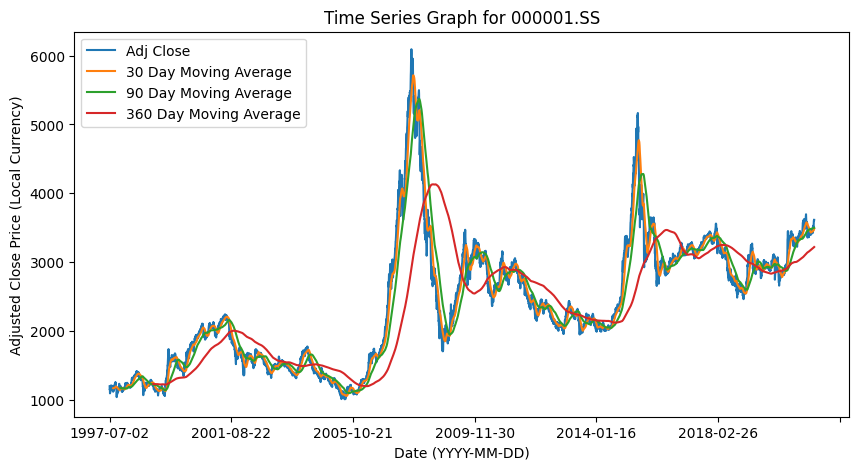

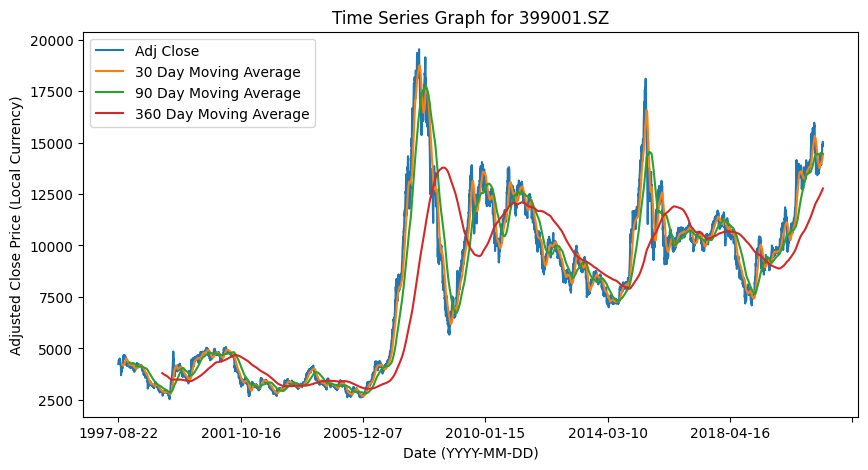

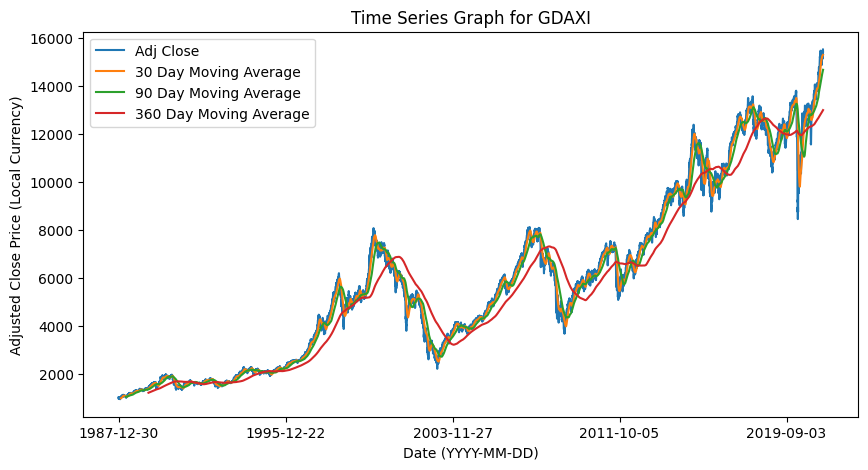

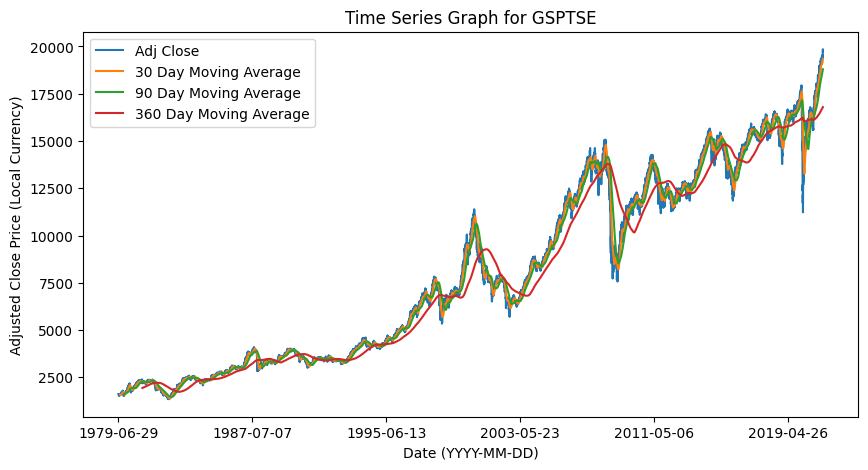

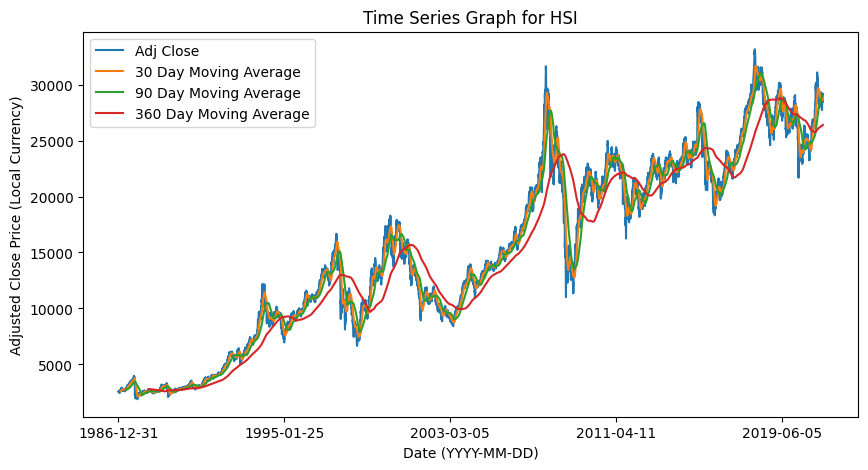

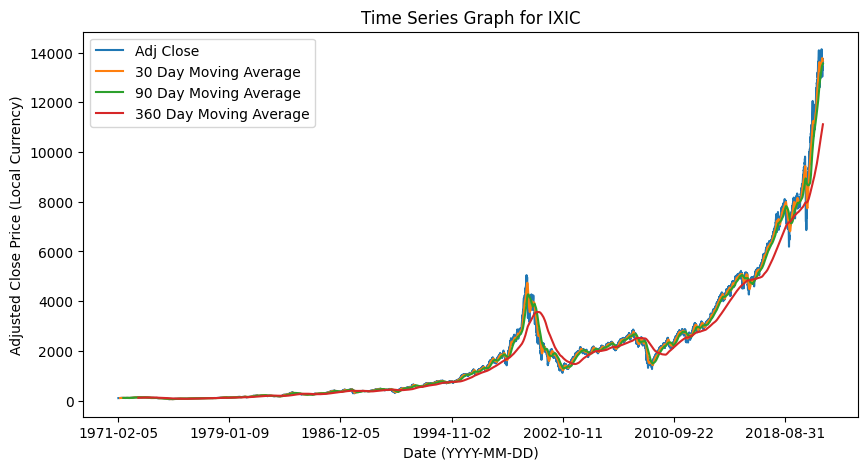

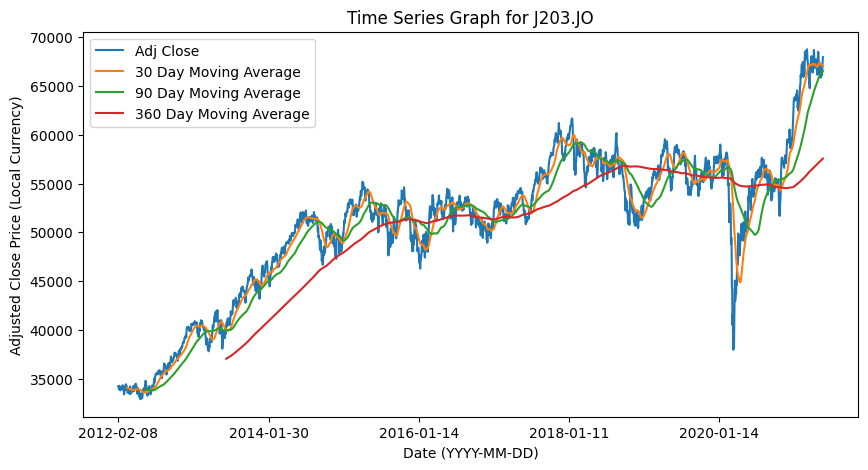

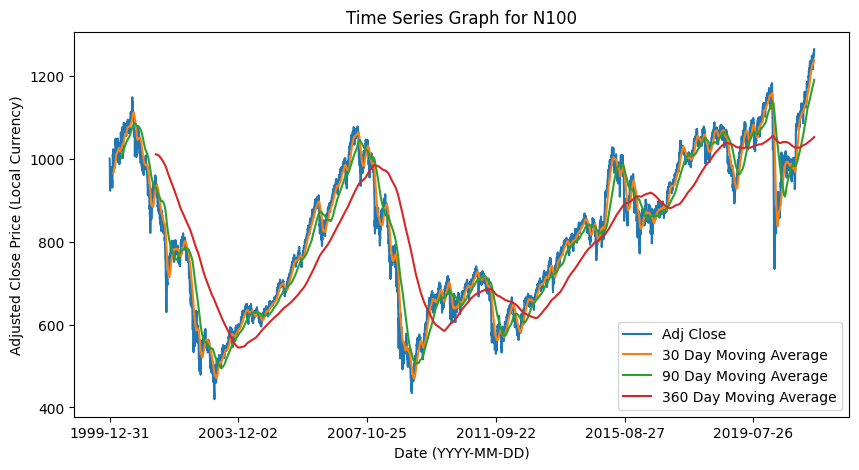

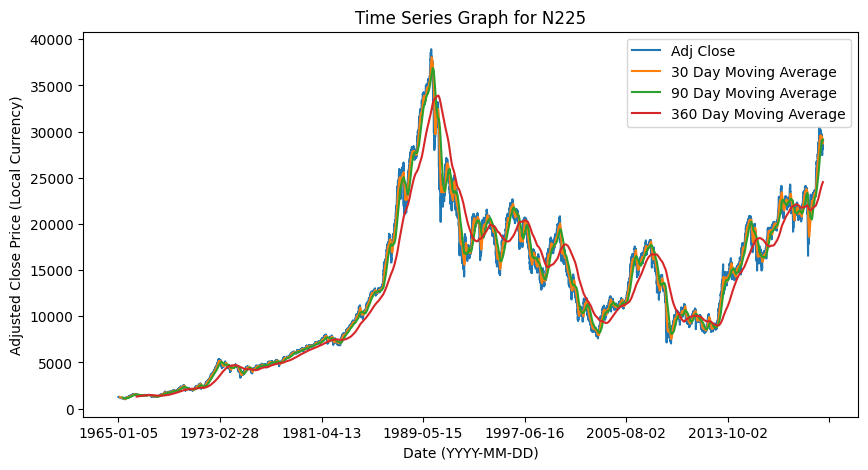

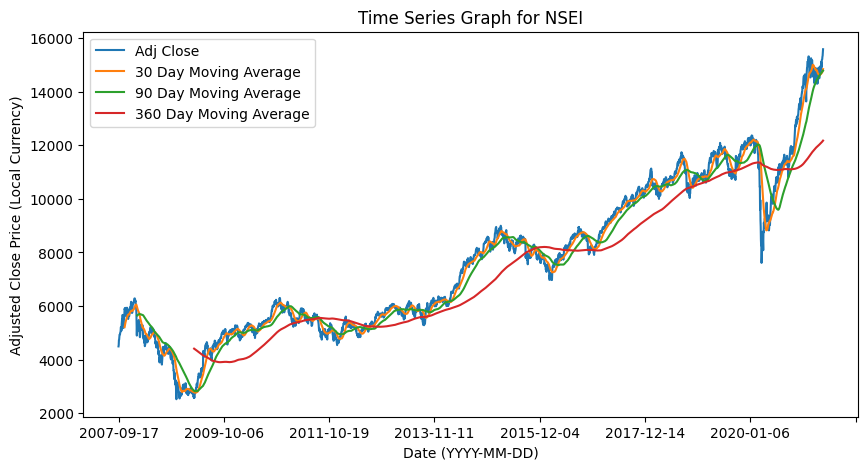

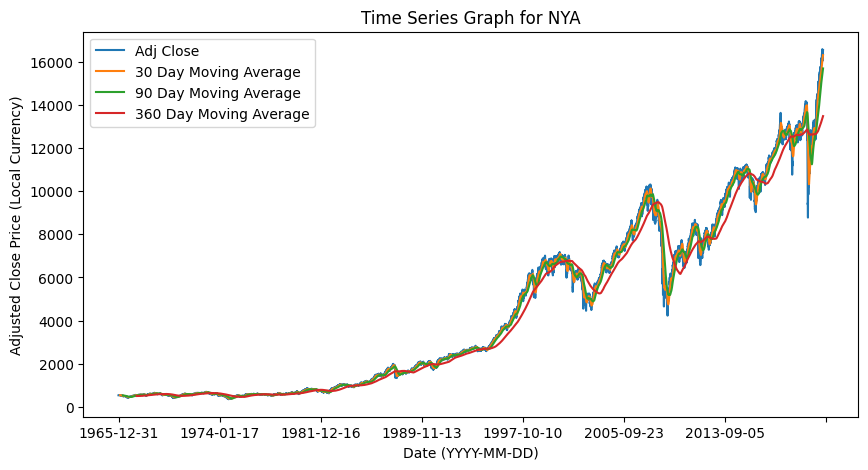

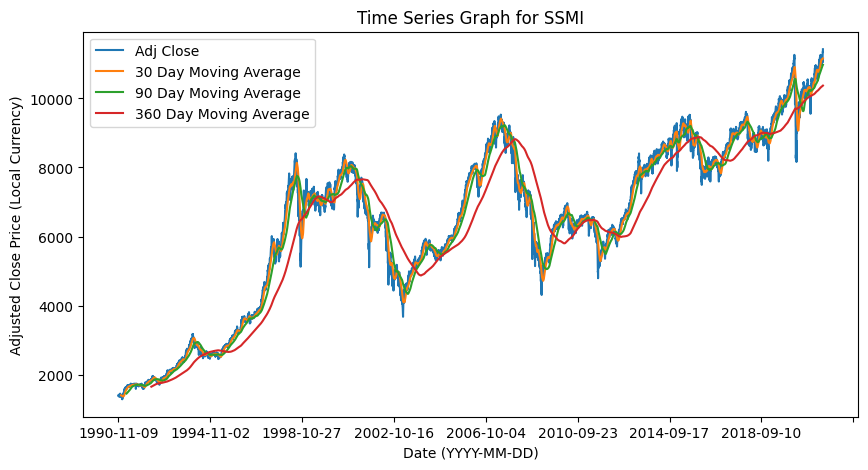

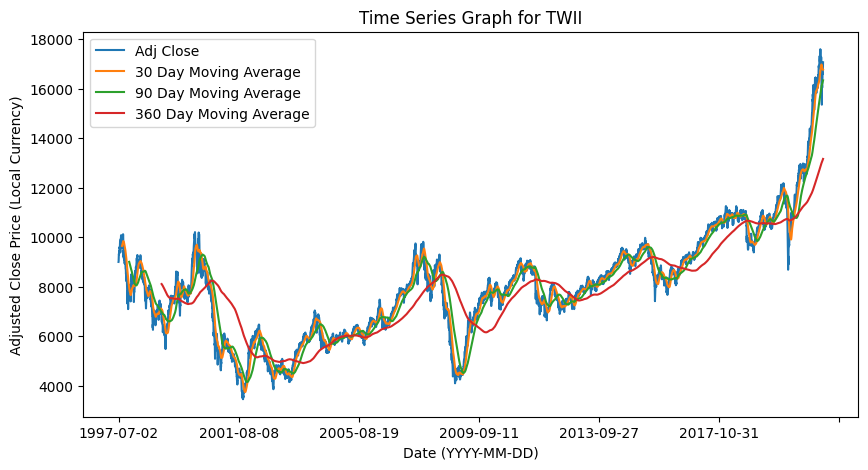

In [10]:
# Generate a time series graph for each index.
for index in train_test_per_index.keys():
    index_data = data_frames_per_index[index]
    # Increasing the window size smooths the data, but reduces the accuracy.
    index_data["30 Day Moving Average"] = index_data["Adj Close"].rolling(30).mean()
    index_data["90 Day Moving Average"] = index_data["Adj Close"].rolling(90).mean()
    index_data["360 Day Moving Average"] = index_data["Adj Close"].rolling(360).mean()
    index_data.plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Moving Average",
            "90 Day Moving Average",
            "360 Day Moving Average",
        ],
        xlabel="Date (YYYY-MM-DD)",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Time Series Graph for {index}",
        figsize=(10, 5),
    )
